# Assignment 2. Mining Twitter
### Due Date: April 12th (Friday) Midnight

In this assignment, you will learn how to do knowledge mining on tweets with Twitter libraries and NLP packages.

### Data

You will use [Twitter libraries](https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries) to download tweets about a certain topic.

### References

- [Twitter libraries](https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries)
- [Natural Language Toolkit](https://www.nltk.org/)
- [word_cloud](https://github.com/amueller/word_cloud)

## Problem 1: Basic Twitter Data Analysis

Pick a [Twitter libraries](https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries), for example [Python Twitter Tools](https://github.com/sixohsix/twitter), download tweets, and visualize tweets.

### Q1: Download Tweets about a Certain Topic (30 pts)

Before you start coding, you need to create your Twitter app first:

1. Go to https://apps.twitter.com/, create your own Twitter app.
2. In Application Management, go to "Keys and Access Tokens".
3. Record "Consumer Key (API Key)" and "Consumer Secret (API Secret)" 
4. In "Token Actions", click "Create my access token"
5. Record "Access Token" and "Access Token Secret"

You will need information from step 3 and 5 to authenticate and download tweets.

Now pick a topic, for example, #heatculter, #az08, or #dartmouth, use the twitter library to download tweets.

For example, if you choose to use [Python Twitter Tools](https://github.com/sixohsix/twitter), do the following:
- Create OAuth object: `twitter.oauth.OAuth`.
- Create Twitter object: `twitter.Twitter`.
- Use `search.tweets()` method to search certain topic tweets.
- Print searched tweets content, `favorite_count` and `retweet_count`.
- Save the tweets to a json file.

You might want to delete your Twitter keys and tokens before submitting the assignment. Remember to submit the downloaded data file.

In [44]:
import twitter

def oauth_login():
    # write your code here
    # return a Twitter object
    auth = twitter.oauth.OAuth(consumer_key = '',
                              consumer_secret = '',
                              token = '',
                              token_secret = '')
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api=oauth_login()

In [45]:
print(twitter_api)

In [46]:
searched_tweets = twitter_api.search.tweets(q='Dartmouth',count=100)
#print(searched_tweets)

In [47]:
favorite_count = []
retweet_count = []

for i in range(100):
    status = searched_tweets['statuses']
    fav = status[i]['favorite_count']
    rt = status[i]['retweet_count']
    favorite_count.append(fav)
    retweet_count.append(rt)
print('Favorite count is: ',favorite_count)
print('Retweet count is: ',retweet_count)

Favorite count is:  [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Retweet count is:  [0, 0, 473, 473, 473, 1, 473, 473, 473, 0, 473, 1, 473, 473, 473, 473, 473, 1, 527, 473, 0, 473, 473, 0, 473, 473, 3, 0, 473, 473, 2, 473, 0, 0, 473, 473, 473, 5, 0, 527, 473, 1, 473, 473, 473, 0, 0, 473, 473, 0, 0, 473, 473, 1, 0, 473, 473, 473, 473, 473, 473, 6, 473, 473, 1, 0, 0, 0, 473, 0, 473, 473, 473, 0, 473, 0, 473, 473, 473, 473, 473, 473, 473, 473, 0, 473, 473, 0, 473, 0, 473, 473, 473, 473, 473, 473, 473, 473, 473, 473]


In [48]:
import json

def twitter_search(twitter_api, q, max_results=200, **kw):

    # See https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets
    # and https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators
    # for details on advanced search criteria that may be useful for 
    # keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    # write your code here
    search_results = twitter_api.search.tweets(q=q,count=100,**kw)
    statuses = search_results['statuses']
    return statuses

# usage sample
twitter_api = oauth_login()

q = "Dartmouth"
results = twitter_search(twitter_api, q, max_results=10)

# write your code here (print and save... etc)
#print(results)

with open('tweet_results.json','w') as file:
    json.dump(results,file)

### Q2:  Extracting text and hashtags from tweets (30 pts)

If we dig into the json structure of the response in Q1, we can find there are two main keys below the root: one is `statuses` (which contains the main part of our interest), and another is `search_metadata`.

In this question, you are asked to count the number of each word in each tweet, and try to construct a table that has `word` and `count` as two columns. Do the same thing on `hashtag` (where can I find hashtag information?). You need to exclude any stop words and punctuations in the tweets before computing word frequencies. You can use `nltk.corpus.stopwords.words()` to get a list of stop words, and get punctuations from `string.punctuation`. Also, take care of upper/lower case, plural nouns, difference verb tenses.

You may need to install nltk first: `pip install nltk`

Make use of `prettytable` package to help you draw a better table. 

Your output should look like this (the form, not the content):
```
+-----------+-------+
| Word      | Count |
+-----------+-------+
| RT        |    56 |
| dartmouth |    53 |
| halifax   |    15 |
| park      |    11 |
| defeat    |    10 |
| brockton  |    10 |
| everi     |    10 |
| admit     |    10 |
| mysteri   |     9 |
| sunken    |     9 |
+-----------+-------+
```

In [49]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#nltk.download('stopwords')

from collections import Counter
from prettytable import PrettyTable

# write your code here
tweet_list = Counter(nltk.word_tokenize(results[0]['text']))
for i in range(1,100):
    z = Counter(nltk.word_tokenize(results[i]['text']))
    tweet_list += z

sw = nltk.corpus.stopwords.words('english')
for i in sw:
    tweet_list.pop(i,None)

for j in string.punctuation:
    tweet_list.pop(j,None)
    
porter = PorterStemmer()
[porter.stem(t) for t in tweet_list]

wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tweet_list]

count = 0

table = PrettyTable(['key','value'])

for key, val in sorted(tweet_list.items(), key = lambda kv:(kv[1],kv[0]),reverse = True):
    if count > 10:
        break
    table.add_row([key,val])
    count+=1
table.field_names = ['Word','Count']
print(table)

+---------------+-------+
|      Word     | Count |
+---------------+-------+
|       RT      |   78  |
|   dartmouth   |   69  |
| veryimportant |   65  |
|   pronounced  |   65  |
|     mouth     |   65  |
|      like     |   65  |
|     'smash    |   65  |
|   Dartmouth   |   23  |
|     https     |   21  |
|       ’       |   4   |
|  theginwyche  |   4   |
+---------------+-------+


In [50]:
import re

hashtag_list = Counter(re.findall(r'#(\w+)',results[0]['text']))
for i in range(1,100):
    z = Counter(re.findall(r'#(\w+)',results[i]['text']))
    hashtag_list += z

for j in string.punctuation:
    hashtag_list.pop(j,None)

porter = PorterStemmer()
[porter.stem(t) for t in hashtag_list]

wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in hashtag_list]
    
count_ht = 0

ht_table = PrettyTable(['key','value'])
for key, val in sorted(hashtag_list.items(), key = lambda kv:(kv[1],kv[0]),reverse = True):
    if count_ht > 10:
        break
    ht_table.add_row([key,val])
    count_ht+=1
ht_table.field_names = ['Word','Count']
print(ht_table)

+---------------+-------+
|      Word     | Count |
+---------------+-------+
|  MakarUpdate  |   3   |
|   Dartmouth   |   2   |
|  likeforlike  |   1   |
| likeforfollow |   1   |
|    dartyszn   |   1   |
|     darty     |   1   |
|  dartmouth23s |   1   |
|  dartmouth23  |   1   |
|   dartmouth   |   1   |
|   Warehouse   |   1   |
|     TGIMD     |   1   |
+---------------+-------+


### Q3: WordCloud Visualization (5 pts)

Use [word_cloud](https://github.com/amueller/word_cloud) to make a word cloud of all the tweets.

(You may need to install word cloud with `conda install -c conda-forge wordcloud`)

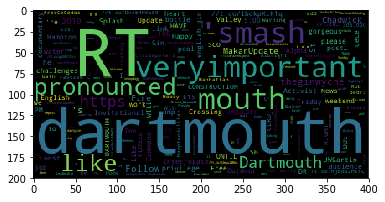

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# write your code here
wc = WordCloud().generate_from_frequencies(tweet_list)
plt.imshow(wc)

## Problem 2: Sementic Analysis for real-time Tweets

You may want to analyze what people are tweeting about right now from a real-time stream of tweets as opposed to querying the Search API for what might be slightly (or very) dated information. In this section, we are going to use `twitter.TwitterStream()` method to sample public data from the Twitter firehose. 

The first step is to use regular expressions to filter out special characters (eg. `,.?!`). For python, a good choice is standard module `re` https://docs.python.org/3/library/re.html. We also recommend you to use https://regex101.com/ as a playground to build up qualified regular expressions of your own.

### Q1: Regular Expression (5 pts)

Now let's compose a simple text preprocessor. Your prepocessor is required to:

(If we define characters that are not `a-z` `A-Z` and `,.!?` as "special character".)

1. filter out all special characters
2. for repeated `,.!?`, your converted result should insert space between them (because that would be convenient for method like `split()` to compute word frequency)

You need to print out "before" and "after" text during your processing. You are provided sample text.

In [52]:
import re

def preprocess_text(text):
    # write your code here
    text = re.findall(r'[A-Za-z.?!, ]',text)
    text = ''.join(text)
    text = re.sub(r'(?<=[.,?!])(?=[^\s])',r' ', text)
    return text

# write code if necessary
sample_text = "this is a pretty awesome book.... but it's a little bit confusing at beginning @@@@@"
print(sample_text)
new_text = preprocess_text(sample_text)
print(new_text)

this is a pretty awesome book.... but it's a little bit confusing at beginning @@@@@
this is a pretty awesome book. . . . but its a little bit confusing at beginning 


### Q2: Sentiment Analysis with nltk (15 pts)
    
Next, we will use NLP package to perform senmentic analysis on tweets.

You need to do following things:

- Download 100 tweets in streaming way and store all tweets in a variable (say `tweets`)
- Preprocess all tweets with `preprocess_text()` method
- Use `SentimentIntensityAnalyzer` from nltk to find out the most positive and the most negative tweet in `tweets`. Show your proof code.

You may need to install nltk first: `pip install nltk`

In [53]:
twitter_stream = twitter.TwitterStream(auth=twitter.oauth.OAuth(consumer_key = 'GcHzOTyU4moQHc4Dgkd50Rqhk',
                              consumer_secret = 'z8zsTxujYebAI5VSUSixizTpsibdvFVidoLediSNIlkeNRlqD1',
                              token = '1110245390966800384-8BRHF0dCP0o23ljLB3Jg5CQ3aA1x1i',
                              token_secret = 'iXFei8NjYVOlDemzP07Z6z6XsykBpfwNR5qiQxjvJpGGX'))
twitter_stream

In [54]:
iterator = twitter_stream.statuses.sample()
iterator

<generator object TwitterJSONIter.__iter__ at 0x0000017804844258>

In [55]:
# pip install nltk
import nltk
#nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# write your code here

neg = []
pos = []

for i in range(100):
    tweet = preprocess_text(results[i]['text'])
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(tweet)
    neg.append(score['neg'])
    pos.append(score['pos'])

bad_tweet = neg.index(max(neg)) # index of where the most negative polarity score is
good_tweet = pos.index(max(pos)) # index of where the most positive polarity score is

print('The most negative tweet is: ', results[bad_tweet]['text'])
print('The most positive tweet is: ', results[good_tweet]['text'])

The most negative tweet is:  Possible Structure Fire
0-50 Block Chadwick St (Dartmouth)
Emergency Crews Dispatched.
The most positive tweet is:  @JWGartin @dartmouth They should never have removed it from the stacks...but I'm happy it's in good, appreciative hands


### Q2: Sentiment Analysis with TextBlob (15 pts)

In this problem, use [TextBlob](https://textblob.readthedocs.io/en/dev/api_reference.html#api-classifiers) to assess each tweet's sentiment. The sentiment has a tuple of form (polarity, subjectivity) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective (from API reference). Please set resonable threshold for both polarity and subjectivity of each tweet, and plot two bar figures that show the classification results.

- Plot figure one with two columns [Positive, Negative].
- Plot figure two with two columns [Objective, Subjective].

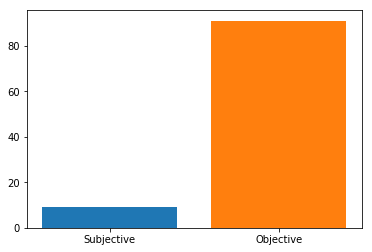

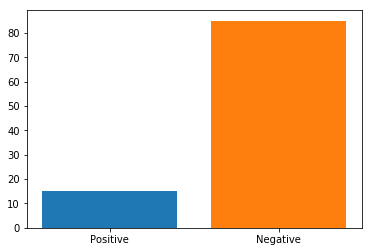

In [56]:
from textblob import TextBlob
# write your code here

subjS = []
subjO = []

polP = []
polN = []

for i in range(100):
    tweet = preprocess_text(results[i]['text'])
    z = (TextBlob(tweet))
    pol = z.sentiment.polarity
    subj = z.sentiment.subjectivity
    if pol > 0:
        polP.append(pol)
    else:
        polN.append(pol)
    if subj > 0.5:
        subjS.append(subj)
    else:
        subjO.append(subj)

plt.bar('Subjective',len(subjS))
plt.bar('Objective',len(subjO))
plt.show()
plt.figure()
plt.bar('Positive',len(polP))
plt.bar('Negative',len(polN))
plt.show()